# MODELISATION

## Imports librairies et jeu de données

In [2]:
# importation des libreries
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer


In [3]:
#Vérifier le répertoire de travail
import os
print(os.getcwd()) 
#modifie le répertoire de travail 
pwd = "C:\ENSAE DE DAKAR\ITS4\ITS4 DIALLO\Machine learning\projet"
os.chdir(pwd)
 
#affiche le nouveau repertoire de travail 
print(os.getcwd())

C:\Users\Mamadou DIALLO
C:\ENSAE DE DAKAR\ITS4\ITS4 DIALLO\Machine learning\projet


In [4]:
##Chargement de la base
data = pd.read_csv('basefinale2.csv', sep=";")

In [6]:
## dimension de notre dataset
data.shape

(122968, 19)

In [7]:
## données manquantes
data.isna().sum()

Unnamed: 0                       0
customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
product_category_name_english    0
Nb_tot_pdts                      0
Tot_moy_achats                   0
Mont_max_achats                  0
nb_payment_dif_com               0
nmbre_echea_tot                  0
nb_commandes                     0
Note_Moy_Com                     0
Cat_la_plus_achetee              0
Nb_moy_pdts_par_com              0
dtype: int64

In [8]:
data.drop(['customer_unique_id', 'customer_id', 'Unnamed: 0'] ,axis=1, inplace=True)

## I. Quelques traitements

In [9]:
# regroupement des varibles selon leur types dans des listes
var_numeric= list(data.select_dtypes(include=['int64','float64', 'uint8']).columns)
var_quali= categorical_features = list(data.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)

In [10]:
var_numeric

['price',
 'freight_value',
 'payment_value',
 'Nb_tot_pdts',
 'Tot_moy_achats',
 'Mont_max_achats',
 'nb_payment_dif_com',
 'nmbre_echea_tot',
 'nb_commandes',
 'Note_Moy_Com',
 'Nb_moy_pdts_par_com']

In [11]:
var_quali

['customer_city',
 'customer_state',
 'payment_type',
 'product_category_name_english',
 'Cat_la_plus_achetee']

In [12]:
### Encodage de la variable type de paiement
data['payment_type'].value_counts()

credit_card    90645
boleto         23756
voucher         6838
debit_card      1729
Name: payment_type, dtype: int64

In [13]:
### Encodage de la variable type de paiement
pay_type=pd.get_dummies(data['payment_type'])

boleto=pay_type['boleto']
credit_card=pay_type['credit_card']
debit_card=pay_type['debit_card']
voucher=pay_type['voucher']

In [14]:
data ['boleto']=boleto
data ['credit_card']=credit_card
data ['debit_card']=debit_card
data ['voucher']=voucher

In [15]:
##représentation de la base finale
data

customer_city customer_state   price  freight_value  \
0                      franca             SP  124.99          21.88   
1       sao bernardo do campo             SP  289.00          46.48   
2                   sao paulo             SP  139.94          17.79   
3             mogi das cruzes             SP  149.94          23.36   
4                    campinas             SP  230.00          22.25   
...                       ...            ...     ...            ...   
122963              sao paulo             SP   74.90          13.88   
122964        taboao da serra             SP  114.90          14.16   
122965              fortaleza             CE   37.00          19.04   
122966                 canoas             RS  689.00          22.07   
122967                  cotia             SP   13.99           7.78   

       payment_type  payment_value product_category_name_english  Nb_tot_pdts  \
0       credit_card         146.87              office_furniture            1   
1       credit_card         335.48                    housewares            1   
2       credit_card         157.73              office_furniture            1   
3       credit_card         173.30              office_furniture            1   
4       credit_card         252.25                  home_confort            1   
...             ...            ...                           ...          ...   
122963  credit_card          88.78        books_general_interest            1   
122964  credit_card         129.06                sports_leisure            1   
122965  credit_card          56.04                 health_beauty            1   
122966  credit_card         711.07                 watches_gifts            1   
122967  credit_card          21.77                     perfumery            1   

        Tot_moy_achats  Mont_max_achats  nb_payment_dif_com  nmbre_echea_tot  \
0               124.99           124.99                 1.0              2.0   
1               289.00           289.00                 1.0              8.0   
2               139.94           139.94                 1.0              7.0   
3               149.94           149.94                 1.0              1.0   
4               230.00           230.00                 1.0              8.0   
...                ...              ...                 ...              ...   
122963           74.90            74.90                 1.0              6.0   
122964          114.90           114.90                 1.0              3.0   
122965           37.00            37.00                 1.0              5.0   
122966          689.00           689.00                 1.0              2.0   
122967           13.99            13.99                 1.0              1.0   

        nb_commandes  Note_Moy_Com     Cat_la_plus_achetee  \
0                  1           4.0        office_furniture   
1                  1           5.0              housewares   
2                  1           5.0        office_furniture   
3                  1           5.0        office_furniture   
4                  1           5.0            home_confort   
...              ...           ...                     ...   
122963             1           4.0  books_general_interest   
122964             1           5.0          sports_leisure   
122965             1           1.0           health_beauty   
122966             1           5.0           watches_gifts   
122967             1           5.0               perfumery   

        Nb_moy_pdts_par_com  boleto  credit_card  debit_card  voucher  
0                       1.0       0            1           0        0  
1                       1.0       0            1           0        0  
2                       1.0       0            1           0        0  
3                       1.0       0            1           0        0  
4                       1.0       0            1           0        0  
...                     ...     ...          ...    

### Division de notre jeu de données

In [16]:
# Divisons de notre jeu de données en donnée test et 
from sklearn.model_selection import train_test_split
X_train, X_test,  = train_test_split(
                     data,  test_size=0.2, random_state=123)
X_test1= X_test.copy()
X_test1.shape

(24594, 20)

## II. Clustering avec l'algorithme du K-Means

In [17]:
### drop des var quali 
X_test1.drop(['customer_city', 'customer_state', 'product_category_name_english', 'payment_type', 'Cat_la_plus_achetee'],axis=1, inplace=True)

In [18]:
X_test1

price  freight_value  payment_value  Nb_tot_pdts  Tot_moy_achats  \
6018     19.99           7.39          27.38            2       54.990000   
44411   195.90          18.94         859.36           10      660.093333   
13002   229.99          21.10         251.09            1      229.990000   
57826   110.00          15.52         125.52            1      110.000000   
54029    59.90          17.67          77.57            1       59.900000   
...        ...            ...            ...          ...             ...   
4449     23.89           9.34          33.23            1       23.890000   
109252   24.98          15.10         120.24            3       74.940000   
80196    29.49          19.40          48.89            1       29.490000   
115098   74.89           8.68          83.57            1       74.890000   
62304    89.00          24.62         227.24            2      178.000000   

        Mont_max_achats  nb_payment_dif_com  nmbre_echea_tot  nb_commandes  \
6018              89.99                 1.0              2.0             2   
44411            219.90                 4.0              4.0             3   
13002            229.99                 1.0              6.0             1   
57826            110.00                 1.0              1.0             1   
54029             59.90                 1.0              1.0             1   
...                 ...                 ...              ...           ...   
4449              23.89                 1.0              1.0             1   
109252            24.98                 3.0             24.0             1   
80196             29.49                 1.0              1.0             1   
115098            74.89                 1.0              1.0             1   
62304             89.00                 2.0              2.0             1   

        Note_Moy_Com  Nb_moy_pdts_par_com  boleto  credit_card  debit_card  \
6018             5.0             2.000000       0            1           0   
44411            3.4             3.333333       1            0           0   
13002            5.0             1.000000       0            1           0   
57826            5.0             1.000000       0            1           0   
54029            3.0             1.000000       0            1           0   
...              ...                  ...     ...          ...         ...   
4449             3.0             1.000000       1            0           0   
109252           5.0             3.000000       0            1           0   
80196            5.0             1.000000       0            1           0   
115098           4.0             1.000000       1            0           0   
62304            5.0             2.000000       1            0           0   

        voucher  
6018          0  
44411         0  
13002         0  
57826         0  
54029         0  
...         ...  
4449          0  
109252        0  
80196         0  
115098        0  
62304         0  

[24594 rows x 15 columns]

### II.1 Standardisation des données

 La standardisation des données consiste à les centrer autour de leur moyenne et à les réduire à une échelle commune. Cela permet de rendre les variables comparables et de s'assurer que l'ACP ne soit pas influencée par les différences d'échelle entre les variables. 
Il est important de standardiser les données avant de les utiliser dans l'ACP car cela permet de mettre toutes les variables sur la même échelle. Ainsi, une variable qui a des valeurs plus élevées ne dominera pas une variable avec des valeurs plus faibles lors de la détermination des clusters. Cela peut également améliorer la performance de nos algorithmes en réduisant le temps de calcul

on utilsiera la méthode StandardScaler de Sklearn pour la standardisation

In [19]:
scaler= StandardScaler()
X_Sta_test= scaler.fit_transform(X_test1) 
type(X_test1) #le type de nos données transformées

pandas.core.frame.DataFrame

In [20]:
#visualisation
X_Sta_test

array([[-0.54904266, -0.7912491 , -0.56662098, ...,  0.59541491,
        -0.11892748, -0.23900719],
       [ 0.42796331, -0.0658657 ,  2.67252051, ..., -1.6795011 ,
        -0.11892748, -0.23900719],
       [ 0.61729952,  0.06979041,  0.30434749, ...,  0.59541491,
        -0.11892748, -0.23900719],
       ...,
       [-0.49627956, -0.03697597, -0.48287625, ...,  0.59541491,
        -0.11892748, -0.23900719],
       [-0.24412749, -0.71023226, -0.34785687, ..., -1.6795011 ,
        -0.11892748, -0.23900719],
       [-0.1657604 ,  0.29085964,  0.21149246, ..., -1.6795011 ,
        -0.11892748, -0.23900719]])

### II. 2 K-means avec les données brutes

 C’est l’un des algorithmes de clustering les plus répandus. Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes *(ou clusters).

Après avoir initialisé des centroïdes en prenant des données au hasard dans le jeu de données, K-means alterne plusieurs fois ces deux étapes pour optimiser les centroïdes et leurs groupes :

* Regrouper chaque objet autour du centroïde le plus proche.
* Replacer chaque centroïde selon la moyenne des descripteurs de son groupe.
L’algorithme a convergé après un certain nombre d'itérations et trouve un découpage stable du jeu de données. Cependant, le nombre de Clusters est à définir par l'utilisateur

   #### 1. Methode du coude 

Pour déterminer le nombre de clusters optimal à utiliser nous allons utilisé la méthode de Coude en ajustant le modèle K-Means avec une plage de valeurs pour K

In [26]:
! pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 435.8 kB/s eta 0:00:00


In [27]:

from yellowbrick.cluster import KElbowVisualizer

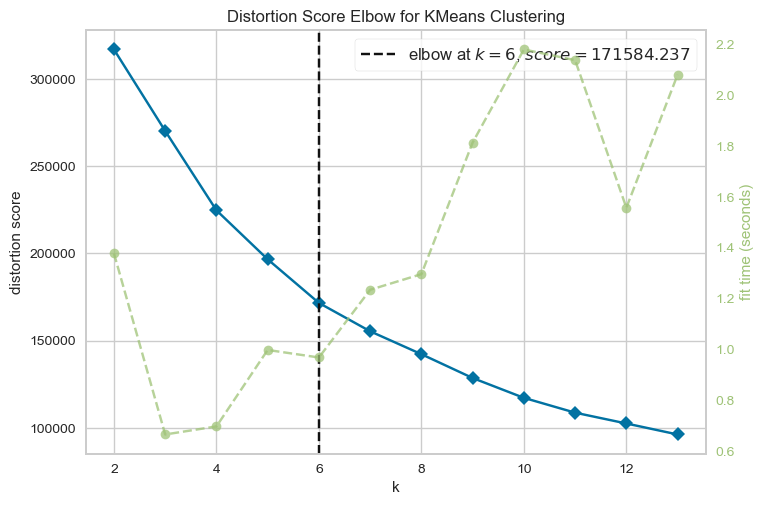

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
## Méthode de coude
kmeans=KMeans()

visualizer= KElbowVisualizer (kmeans, k= (2,14))
#ON APPLIQUE NOTRE VISUALISER SUR NOTRE JEU DE DONNEES
visualizer.fit(X_Sta_test)

##affichage du graphe coude

visualizer.show()

In [29]:
### clustering avec 6 clusters
Kmeans1= KMeans(n_clusters=6)
#ON APPLIQUE LE MODELE AU DONNEES AVEC fit ()
Kmeans1.fit(X_Sta_test)
#garder les cluster dans une variable
clusters_kmeans1=Kmeans1.predict(X_Sta_test)

#### 2. Caractérisation des clusters k-means

In [30]:
##ajouter des clusters dans notre bases 
X_test1['clusters_kmeans']= clusters_kmeans1

##calcul des différents moyenne par clusters
Xt_kmean1=X_test1.groupby(['clusters_kmeans']).mean()
Xt_kmean1

price  freight_value  payment_value  Nb_tot_pdts  \
clusters_kmeans                                                          
0                100.279077      19.055234     149.883966     1.682469   
1                 88.920103      18.641676     150.127451     1.741202   
2                870.271988      55.751213    1144.102398     2.456140   
3                 89.235471      19.063407      68.099160     5.379121   
4                 40.687442      17.249302       7.074186    75.000000   
5                 98.825249      18.625220     137.119062     1.428152   

                 Tot_moy_achats  Mont_max_achats  nb_payment_dif_com  \
clusters_kmeans                                                        
0                    133.952863       107.615340            1.464018   
1                    123.698351        95.420946            1.512446   
2                   1340.721362       893.988085            2.346491   
3                    394.960637        97.598556            4.875196   
4                   1423.890000        83.800000           58.255814   
5                    116.478529       104.300205            1.281525   

                 nmbre_echea_tot  nb_commandes  Note_Moy_Com  \
clusters_kmeans                                                
0                       5.520521      1.151262      4.093147   
1                       1.512446      1.146996      4.083408   
2                      13.149123      1.074561      4.062949   
3                       6.161695      1.182104      4.032063   
4                      58.255814      2.000000      5.000000   
5                       1.281525      1.108504      4.257890   

                 Nb_moy_pdts_par_com    boleto  credit_card  debit_card  \
clusters_kmeans                                                           
0                           1.705889  0.000000     1.000000    0.000000   
1                           1.713348  1.000000     0.000000    0.000000   
2                           2.485380  0.153509     0.793860    0.002924   
3                           5.506485  0.000000     0.017268    0.000000   
4                         112.500000  0.000000     0.000000    0.000000   
5                           1.447214  0.000000     0.000000    1.000000   

                  voucher  
clusters_kmeans            
0                0.000000  
1                0.000000  
2                0.049708  
3                0.982732  
4                1.000000  
5                0.000000

In [31]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [32]:
plot_radars(data=Xt_kmean1,
            group="clusters_kmeans")

Nous allons à présent réaliser une réduction dimensionnelle pour vérifier si le clustering est réalisable sur un nombre réduit de variables sans perturber les groupes

### II.3 K-means avec reduction dimensionnelle

#### 1. Reduction de dimention

##### 1.1 ACP linéaire

L'analyse en composantes principales (ACP) linéaire est basée sur la décomposition en valeurs singulières (SVD) et suppose que les données sont linéairement liées. Elle permet de réduire les dimensions des données en mettant en évidence les directions principales de variation des données, qui sont des combinaisons linéaires des variables d'origine

 ###### a. Nombre de composantes optimal pour l'ACP

On utilisera la méthode de l'elbow pour déterminer le nombre optimal de composantes. La méthode de l'elbow consiste à tracer le pourcentage de variance expliquée par chaque composante, puis à choisir le nombre de composantes qui correspond à l'endroit où la courbe forme un coude.

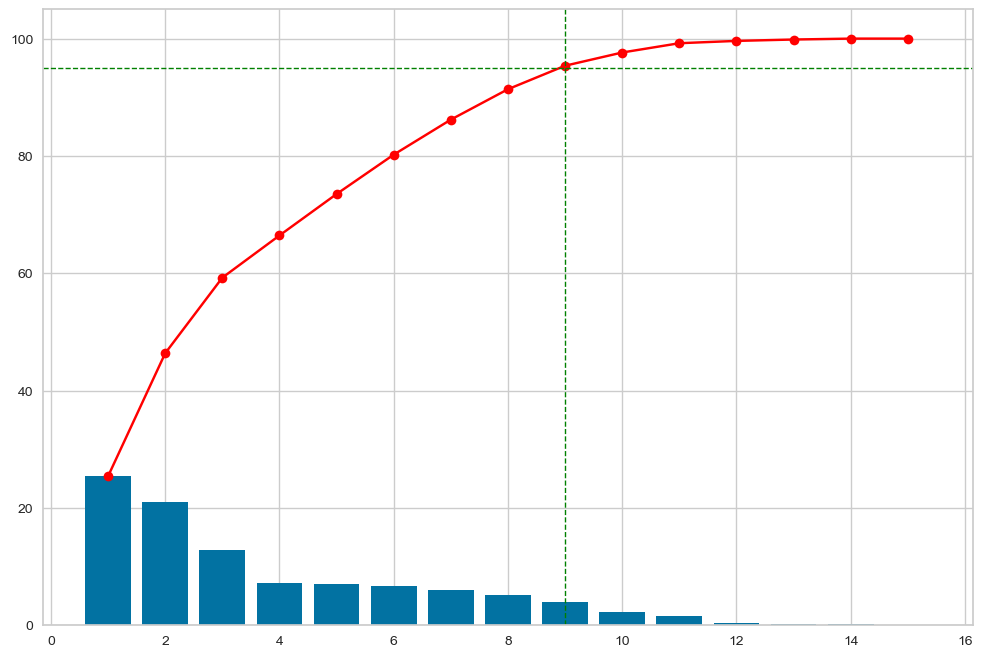

In [33]:
# Initialiser l'ACP
pca = PCA()

# Ajuster les données à l'ACP
pca=pca.fit(X_Sta_test)

# Variance expliquée
varexpl = pca.explained_variance_ratio_*100

# graphe des variance cumulées
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

Il faut donc conserver 9 axes principaux pour pouvoir expliquer la variance à 95% de nos données

###### b. L'analyse

In [35]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_Sta_test)


###### c. Visualisation des données

In [36]:
comp1 = X_pca[:,0]
comp2 = X_pca[:,1]

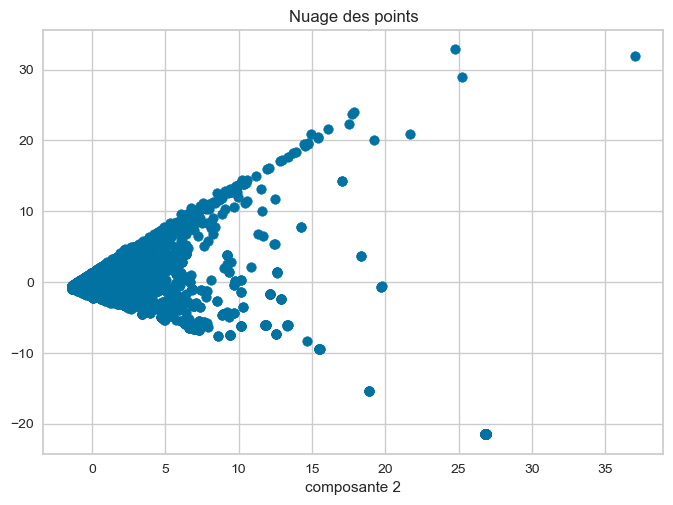

In [37]:
plt.scatter(X_pca[:, 0],X_pca[:, 1])
plt.xlabel ("composante 1")
plt.xlabel ("composante 2")
plt.title("Nuage des points")
plt.show()

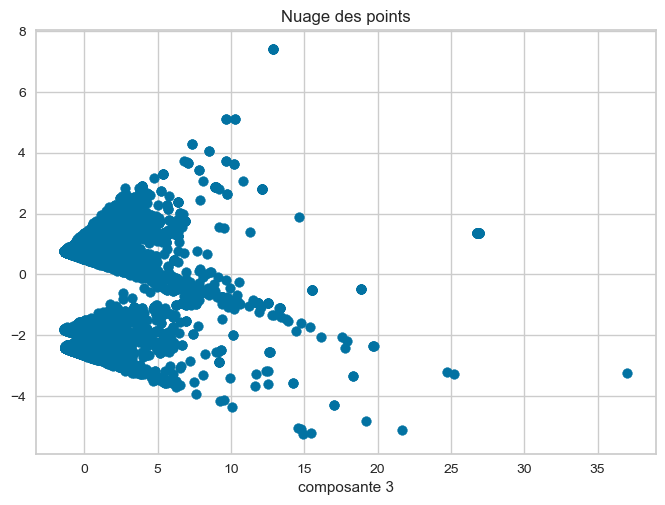

In [38]:
## Nuages des individus
plt.scatter(X_pca[:, 0],X_pca[:, 2])
plt.xlabel ("composante 1")
plt.xlabel ("composante 3")
plt.title("Nuage des points")
plt.show()

##### 1.2 ACP non linéaire

L'ACP non lineaire permet de faire une réduction de dimensionnalité non linéaire sur notre jeu de données. Nous utiliseront nos données de test standardisées (X_Sta_test)
la fonction KernelPCA de Sklearn pour son execution

In [39]:
kpca=KernelPCA(n_components=2 , kernel = 'rbf')
X_kpca=kpca.fit_transform(X_Sta_test)
X_kpca

array([[-0.19352798, -0.0507352 ],
       [ 0.46192035,  0.29629339],
       [-0.26486318,  0.00885771],
       ...,
       [-0.34952396, -0.19004202],
       [ 0.59293273, -0.44738989],
       [ 0.58614   , -0.43377423]])

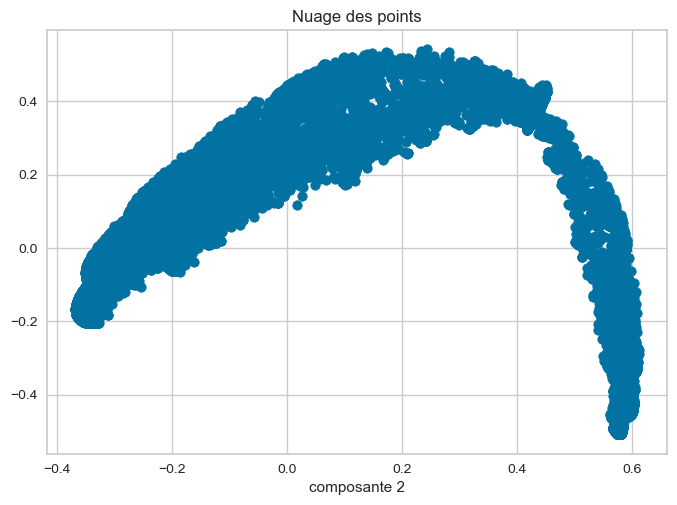

In [40]:
plt.scatter(X_kpca[:, 0],X_kpca[:, 1])
plt.xlabel ("composante 1")
plt.xlabel ("composante 2")
plt.title("Nuage des points")
plt.show()

#### 2. Methode du coude 

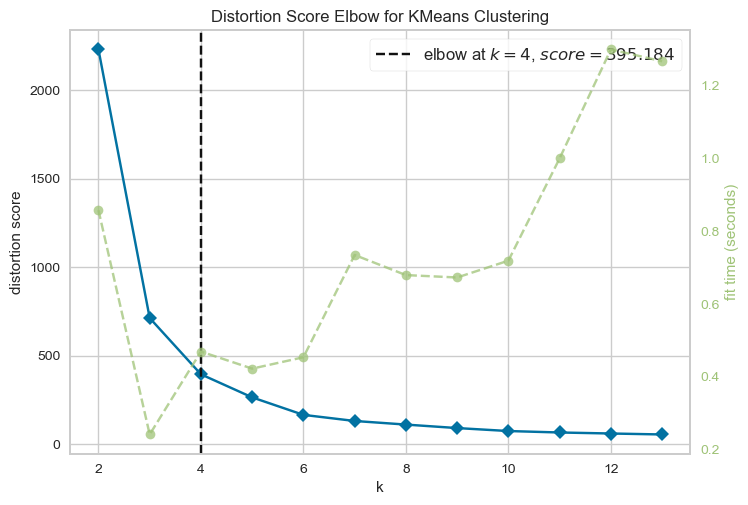

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
## Méthode de coude
kmeans=KMeans()

visualizer= KElbowVisualizer (kmeans, k= (2,14))
#ON APPLIQUE NOTRE VISUALISER SUR NOTRE JEU DE DONNEES
visualizer.fit(X_kpca)

##affichage du graphe coude

visualizer.show()

#### 3. l'Alghorithme de k-means

In [80]:
### clustering avec 6 clusters
kmeans2= KMeans(n_clusters=6)
#ON APPLIQUE LE MODELE AU DONNEES AVEC fit ()
kmeans2.fit(X_pca)
#garder les cluster dans une variable
clusters_kmeans2=kmeans2.predict(X_pca)

In [81]:
clusters_kmeans2

array([0, 2, 0, ..., 0, 2, 2])

##### Caractérisation des clusters k-means

In [82]:
import pandas as pd
##ajouter des clusters dans notre bases
X_test1['clusters_kmeans']= clusters_kmeans2


In [83]:

##calcul des différents moyenne par clusters
Xt_kmean2=X_test1.groupby(['clusters_kmeans']).mean()
Xt_kmean2

price  freight_value  payment_value  Nb_tot_pdts  \
clusters_kmeans                                                          
0                100.190140      19.033266     149.822372     1.689326   
1                 46.852549      18.132549       8.065882    69.196078   
2                 88.832084      18.640468     149.957974     1.741146   
3                867.722297      55.912442    1141.051337     2.449128   
4                 98.825249      18.625220     137.119062     1.428152   
5                 89.756043      19.145504      68.118573     5.092784   

                 Tot_moy_achats  Mont_max_achats  nb_payment_dif_com  \
clusters_kmeans                                                        
0                    133.743875       107.527115            1.469706   
1                   1677.337843        83.202353           55.078431   
2                    123.532156        95.334323            1.512342   
3                   1336.016441       891.300509            2.340116   
4                    116.478529       104.300205            1.281525   
5                    381.478205        98.183775            4.600317   

                 nmbre_echea_tot  nb_commandes  Note_Moy_Com  \
clusters_kmeans                                                
0                       5.529612      1.151415      4.092413   
1                      55.078431      1.843137      5.000000   
2                       1.512342      1.147027      4.084070   
3                      13.103198      1.074128      4.062583   
4                       1.281525      1.108504      4.257890   
5                       5.833466      1.181602      4.033776   

                 Nb_moy_pdts_par_com   boleto  credit_card  debit_card  \
clusters_kmeans                                                          
0                           1.711265  0.00000     1.000000    0.000000   
1                         100.813725  0.00000     0.019608    0.000000   
2                           1.713287  1.00000     0.000000    0.000000   
3                           2.478198  0.15407     0.793605    0.002907   
4                           1.447214  0.00000     0.000000    1.000000   
5                           5.242079  0.00000     0.012688    0.000000   

                  voucher  
clusters_kmeans            
0                0.000000  
1                0.980392  
2                0.000000  
3                0.049419  
4                0.000000  
5                0.987312

In [84]:
plot_radars(data=Xt_kmean2,
            group="clusters_kmeans")

#### 4 Evaluation 

In [57]:
Coef1=silhouette_score(X_Sta_test, kmeans2.fit_predict(X_Sta_test))
Coef2=silhouette_score(X_kpca, kmeans2.fit_predict(X_kpca))

In [58]:
Coef1

0.44009135790093784

In [59]:
Coef2

0.6426529222317087

<span style="color:red"> REMARQUE </span>
La réduction de dimenssion offre les mêmes clusters. Il est donc possible de réduire le nombre de features en entrée et d'utiliser les variables synthétiques de l'ACP pour segmenter notre fichier client, ce d'autant plus que le score silhouette est  meilleurs comparés au k-means utilisant les données brutes

Nous allons donc conserver le modèle de k-means avec une réduction dimentionnelle lors de l'évaluation des modèles

## III. Classification Ascendante Hierarchique

Le clustering hiérarchique a l’avantage de ne pas requérir de définir à l’avance le nombre de clusters, ce qui permet d’explorer toutes les possibilités le long du dendrogramme. Cependant, il faut généralement prendre cette décision à un moment. Il est possible pour cela d’utiliser un dendrogramme, pour y déceler un « niveau » auquel les clusters sont clairement distants les uns des autres. Ainsi pour determiner le nombres de clusters. Toutefois Une solution alternative est d’évaluer les différents modèles pour différentes valeurs de k et vérifier la partition optimale à l’aide d’une mesure de performance telle que le coefficient de silhouette. 
    

### III.1 Determination du nombre de clusters optimal

In [60]:
X_test3= X_test.copy()

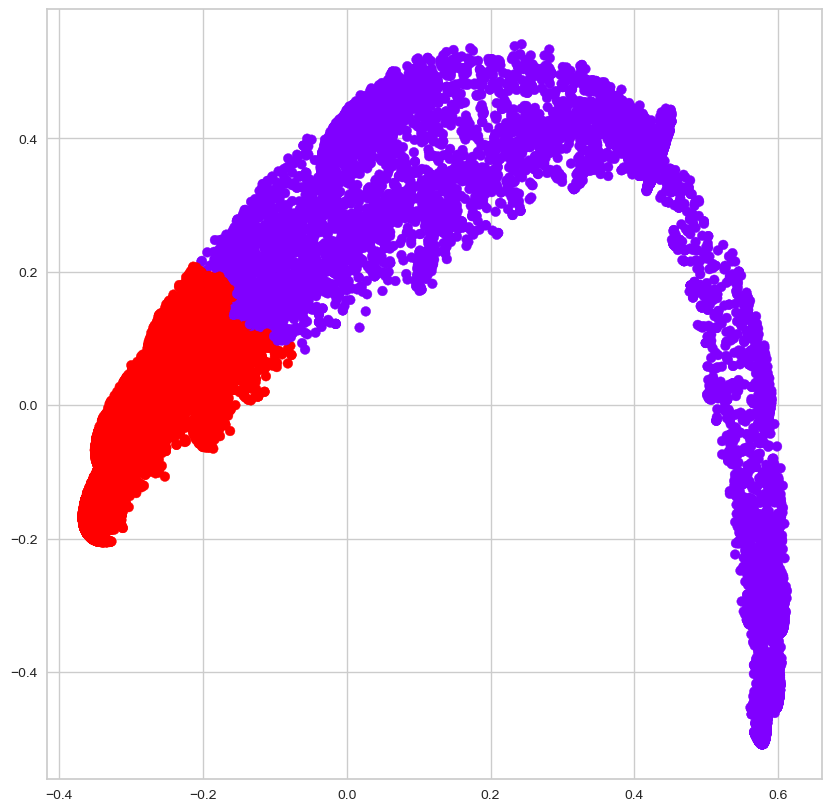

In [61]:
#model 1
CAH_1 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_1.fit_predict(X_kpca), cmap ='rainbow')
plt.show()

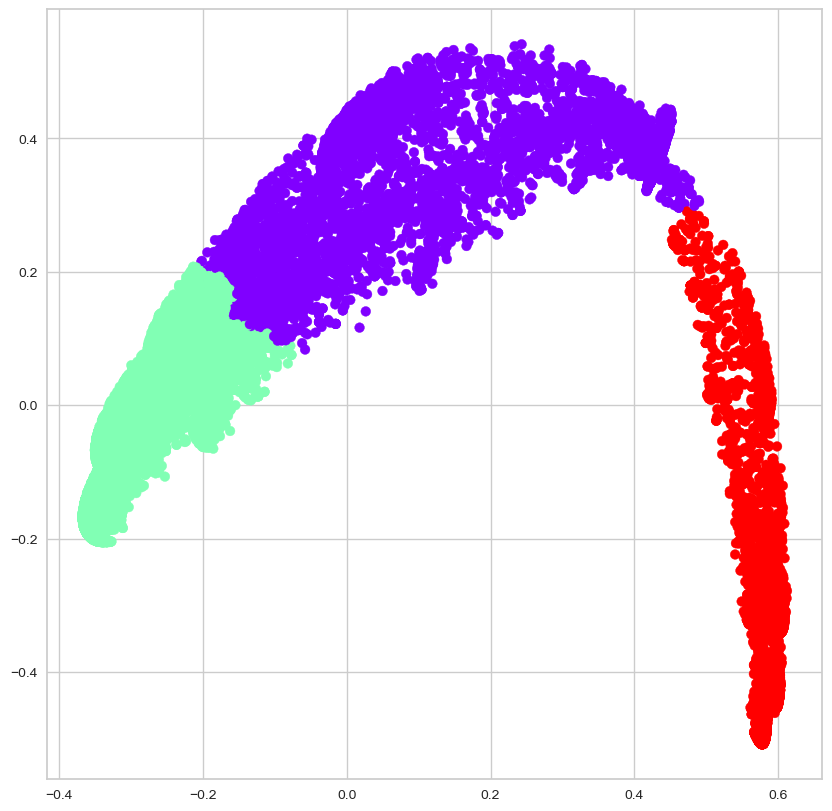

In [62]:
#model 2
CAH_2 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_2.fit_predict(X_kpca), cmap ='rainbow')
plt.show()

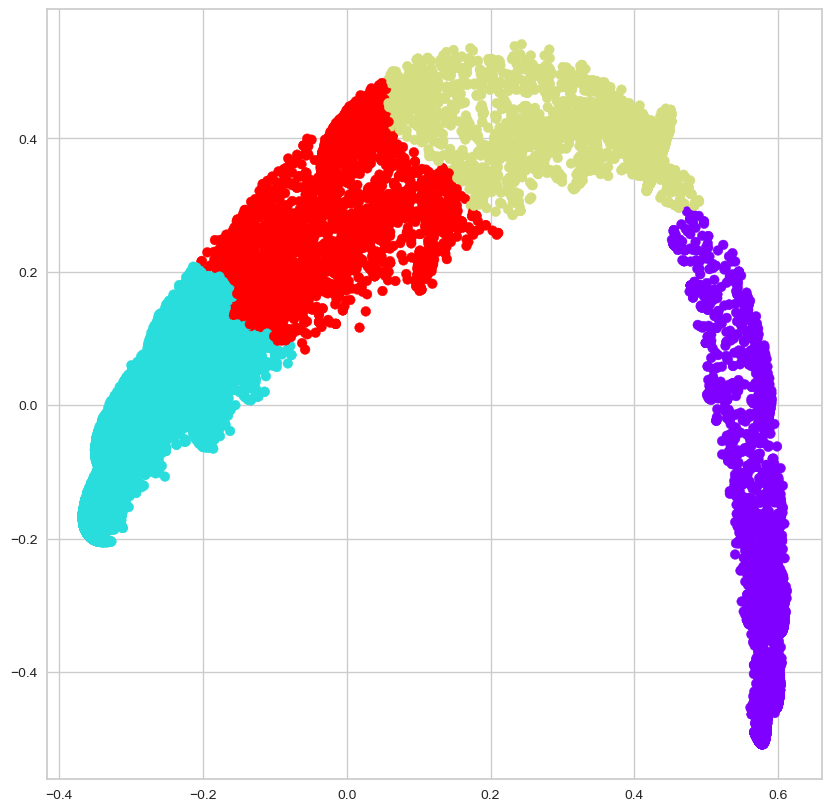

In [63]:
#model 3
CAH_3 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_3.fit_predict(X_kpca), cmap ='rainbow')
plt.show()  

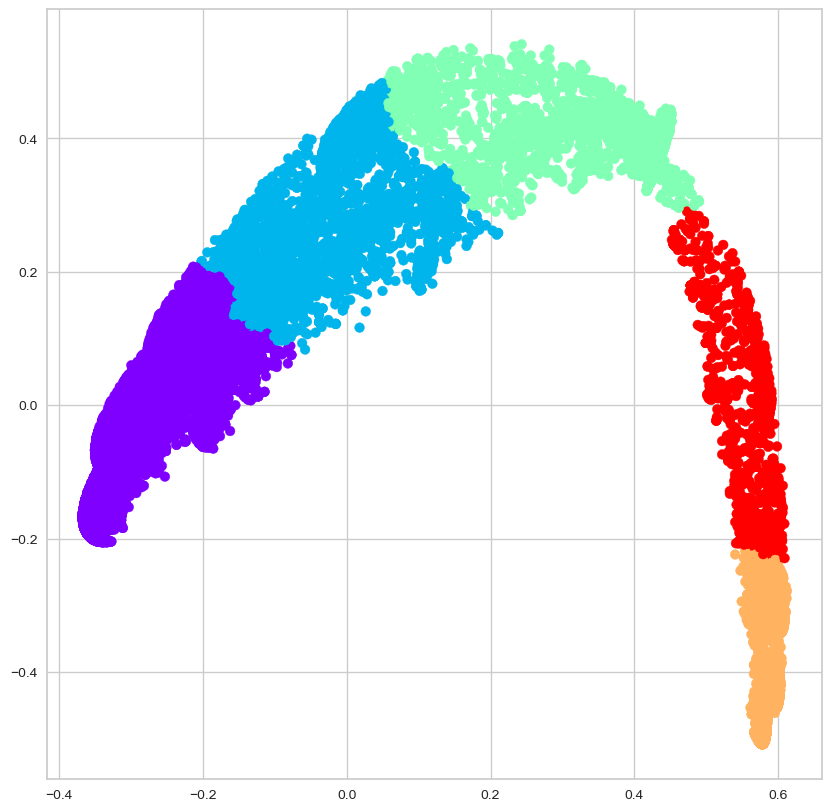

In [64]:
#model 5
CAH_4 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_4.fit_predict(X_kpca), cmap ='rainbow')
plt.show() 

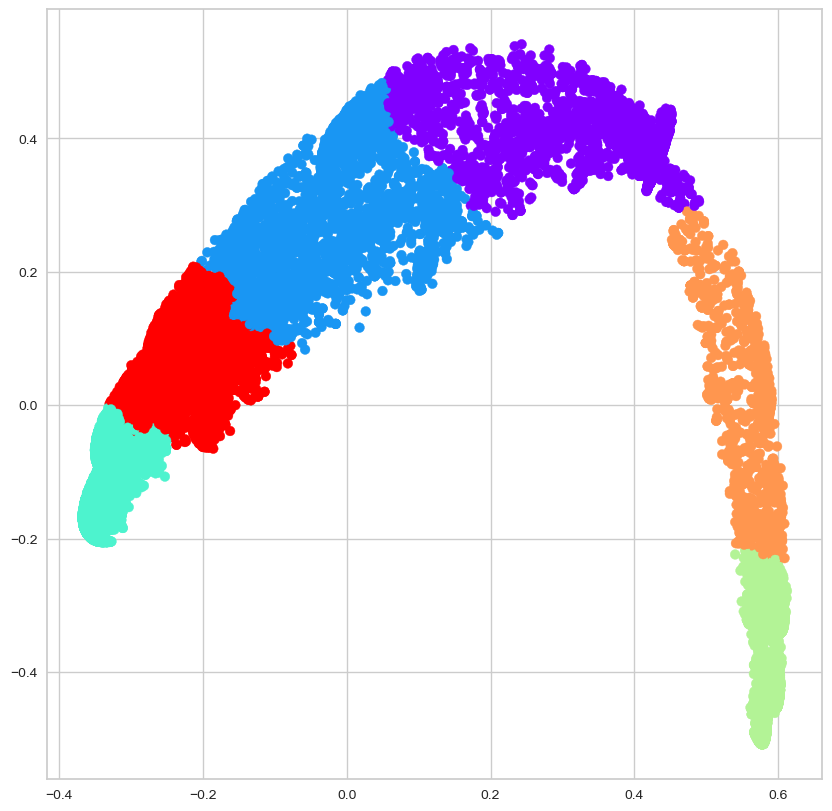

In [65]:
#model 6
CAH_5 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_5.fit_predict(X_kpca), cmap ='rainbow')
plt.show()    

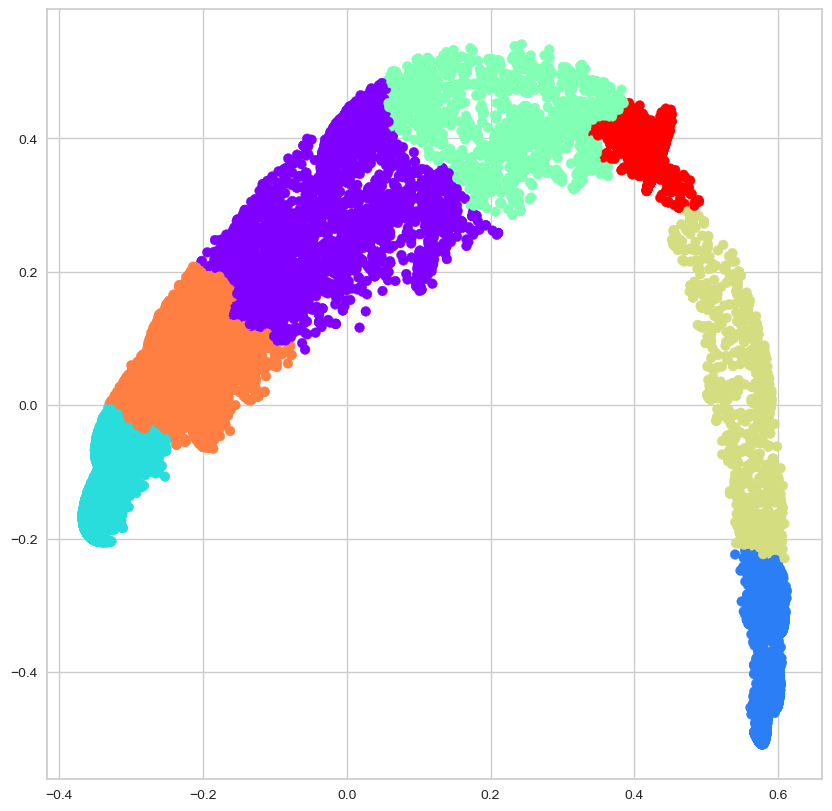

In [66]:
#model 7
CAH_6 = AgglomerativeClustering(n_clusters = 7)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_6.fit_predict(X_kpca), cmap ='rainbow')
plt.show()  

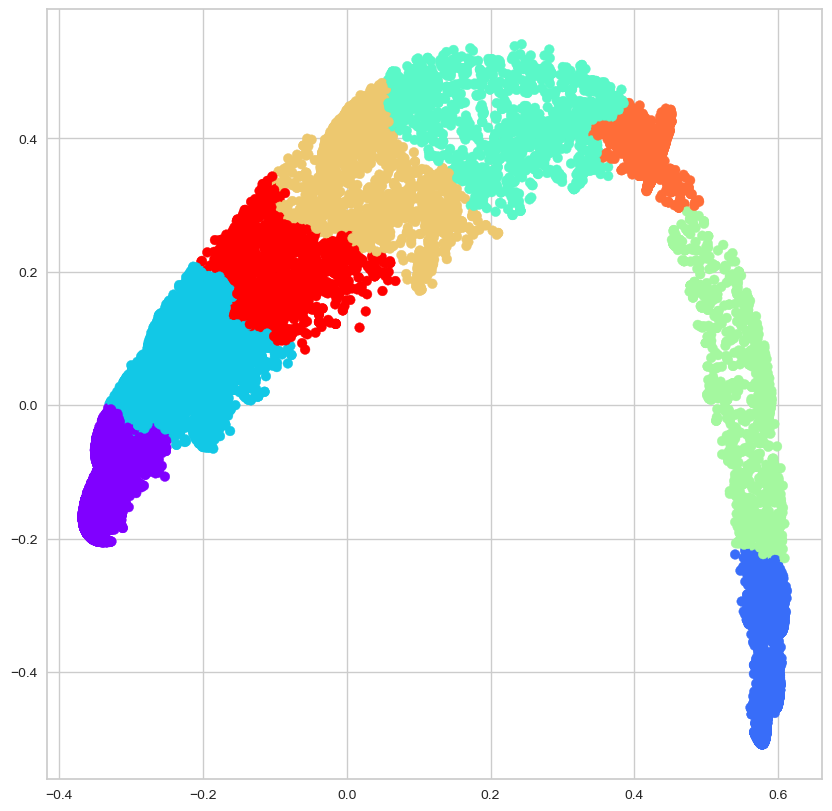

In [67]:
#model 8
CAH_7 = AgglomerativeClustering(n_clusters = 8)
plt.figure(figsize =(10, 10))
plt.scatter(X_kpca[:,0], X_kpca[:,1],
            c = CAH_7.fit_predict(X_kpca), cmap ='rainbow')
plt.show()   
  

#### 1. Coefficient de silhouette

Afin de retenir un nombre de clusters optimal, nous allons visualiser les coefficients des differents modèles ci-dessus et retenir celui qui minimise ce coefficient

In [68]:
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_1.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_2.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_3.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_4.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_5.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_6.fit_predict(X_kpca)))
silhouette_scores.append(
        silhouette_score(X_kpca, CAH_7.fit_predict(X_kpca)))

#### 2. Visualisation des coefficients

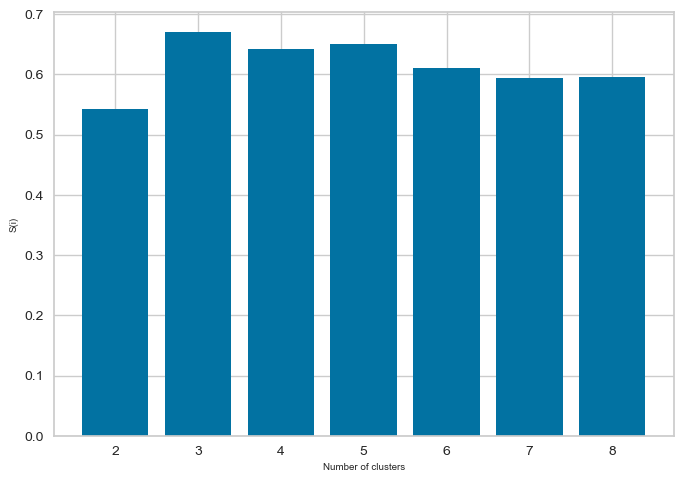

In [69]:
# Plotting a bar graph to compare the results
import matplotlib.pyplot as plt
k = [2, 3, 4, 5, 6, 7, 8]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 7)
plt.ylabel('S(i)', fontsize = 7)
plt.show()

Ainsi, à l'aide des scores de silhouette, il est conclu que le nombre optimal de clusters pour les données et la technique de clustering données est de 3

### III.2 CAH sur les données testes

Nous allons d'abord presenter un dendrogramme tout en initialisant d'abord le seuil (thresholds) à 0 et ensuite par l'analyse de ce graphique nous allons estimer le seui qui nous donnes une partition de 3 classes  

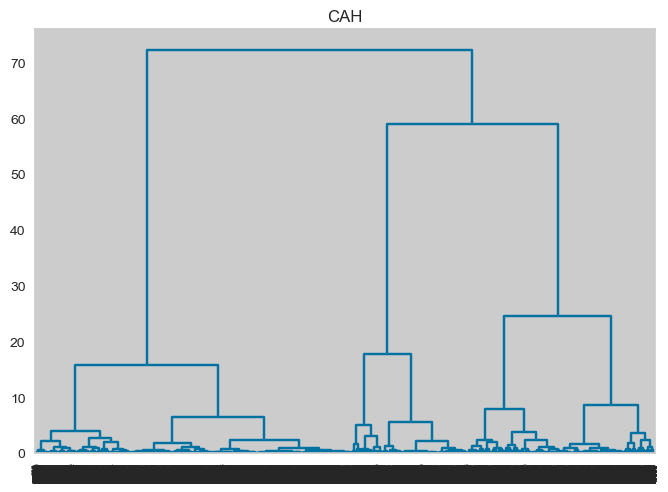

In [70]:
from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(X_kpca,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,orientation='top',color_threshold=0)
plt.show()

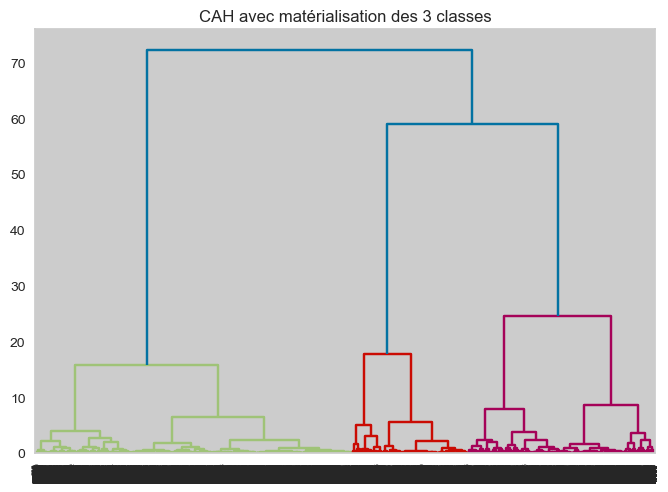

[1 3 1 ... 1 2 2]


In [71]:
from scipy.cluster.hierarchy import ward, fcluster
#matérialisation des 3 classes (hauteur t = 30)
plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,orientation='top',color_threshold=30)
plt.show()
#découpage à la hauteur t = 30 ==> identifiants de 3 groupes obtenus
groupes_cah = fcluster(Z,t=30,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)

On remarque que les résultats obtenus ici ne sont pas vraissemblables vu la taille de nos données. Le CAH a un temps d'entrainement et de prédiction plus long, nous allons donc conserver la segmentation avec le modèle K-Means.

## Entrainement du modèle final

### I. Standardisation des données

In [72]:
X_train1= X_train.copy()
X_train1.drop(['customer_city', 'customer_state', 'product_category_name_english', 'payment_type','payment_type', 'Cat_la_plus_achetee'],axis=1, inplace=True)

In [73]:
scaler= StandardScaler()
X_Sta_test2= scaler.fit_transform(X_train1) 

### II.Reduction dimentionnelle (ACP linéaire)

### II.1 Nombre de composantes optimal

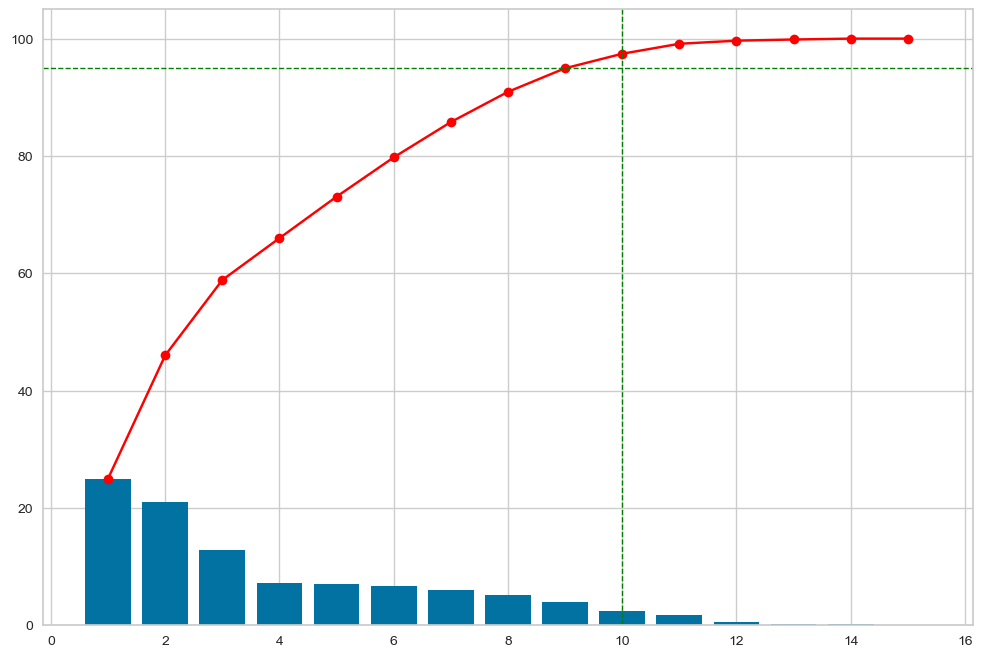

In [74]:
# Initialiser l'ACP
pca = PCA()

# Ajuster les données à l'ACP
pca=pca.fit(X_Sta_test2)

# Variance expliquée
varexpl = pca.explained_variance_ratio_*100

# graphe des variance cumulées
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

In [75]:
pca2 = PCA(n_components = 10)
X_pca2 = pca.fit_transform(X_Sta_test2)

### III. K-MEANS

### III.1 Methode de coude

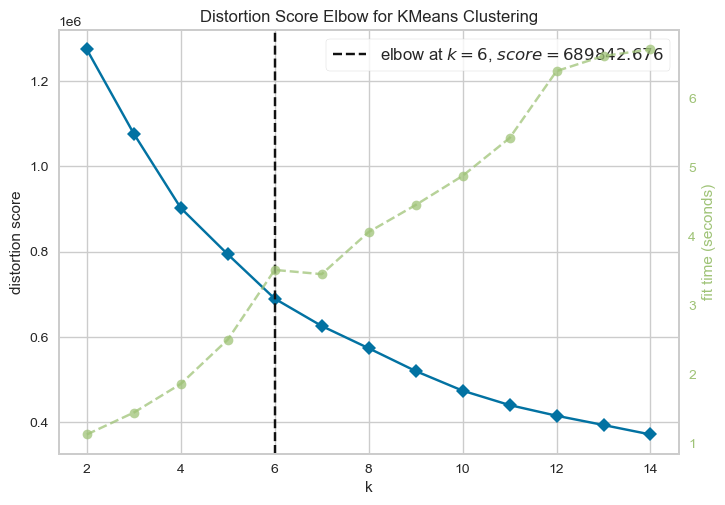

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
## Méthode de coude
kmeans=KMeans()

visualizer= KElbowVisualizer (kmeans, k= (2,15))
#ON APPLIQUE NOTRE VISUALISER SUR NOTRE JEU DE DONNEES
visualizer.fit(X_pca2)

##affichage du graphe coude

visualizer.show()

### III.2 k-means 

In [77]:
### clustering avec 6 clusters
kmeansf= KMeans(n_clusters=6)
#ON APPLIQUE LE MODELE AU DONNEES AVEC fit ()
kmeansf.fit(X_pca2)
#garder les cluster dans une variable
clusters_kmeansf=kmeansf.predict(X_pca2)

In [78]:
##ajouter des clusters dans notre bases

X_train['clusters_kmeans']= clusters_kmeansf

##calcul des différents moyenne par clusters
Xt_kmeanf=X_train.groupby(['clusters_kmeans']).mean()
Xt_kmeanf

price  freight_value  payment_value  Nb_tot_pdts  \
clusters_kmeans                                                          
0                 99.979354      18.955748     149.318028     1.700860   
1                 88.278541      18.822990     150.001969     1.744839   
2                860.374156      54.495305    1137.490123     2.410192   
3                 43.365472      19.635000       7.870330    69.764151   
4                 85.015666      19.075485      61.057451     4.879877   
5                 92.093246      17.960655     132.473886     1.451965   

                 Tot_moy_achats  Mont_max_achats  nb_payment_dif_com  \
clusters_kmeans                                                        
0                    133.275121       107.310584            1.476787   
1                    123.969826        95.047855            1.520484   
2                   1373.630908       878.852168            2.327792   
3                   1652.531038        83.260849           51.764151   
4                    358.649369        92.135595            4.399193   
5                    109.851846        95.908828            1.358806   

                 nmbre_echea_tot  nb_commandes  Note_Moy_Com  \
clusters_kmeans                                                
0                       5.667450      1.159461      4.094832   
1                       1.520484      1.147312      4.092561   
2                      11.503072      1.056740      3.950061   
3                      51.764151      1.858491      5.000000   
4                       5.412454      1.175283      4.042056   
5                       1.360262      1.075691      4.212839   

                 Nb_moy_pdts_par_com    boleto  credit_card  debit_card  \
clusters_kmeans                                                           
0                           1.708522  0.000000     1.000000    0.000000   
1                           1.716511  1.000000     0.000000    0.000000   
2                           2.532285  0.141308     0.814239    0.004337   
3                         101.957547  0.000000     0.004717    0.000000   
4                           5.170501  0.000000     0.003075    0.000000   
5                           1.478530  0.000000     0.000000    1.000000   

                  voucher  
clusters_kmeans            
0                0.000000  
1                0.000000  
2                0.040116  
3                0.995283  
4                0.996925  
5                0.000000

### 3. Analyse des clusters par radar

In [79]:
plot_radars(data=Xt_kmeanf,
            group="clusters_kmeans")

## Conclusion

* Groupe 1 :  Ce sont des clients qui payent leur transaction par la carte de crédit, par échéances faibles . ils commandent souvent les articles de bas prix à des fréquences faibles. Les avis de ces clients ne sont pas très bons.

* Groupe 2 :  regroupe des clients qui ne font ni beaucoup de dépenses ni de commandes. Il règlent leur transaction avec du voucher. Cependant leurs avis sur les produits ne sont pas très bons.  

* Groupe 3 : Ce sont des clients qui passent très peu de commandes . Ils achètent des produits pas chers pour des montants de dépense et des frais transaction relativement tès faibles.ils règlent souvent leur transaction avec une carte de de débit

* Groupe 4 : Ce sont des clients qui font des dépenses de transaction importantes, à frais élevé sur les produits relativement chers avec un nombre d'échéance très faibles. ils règlent souvent leur transaction avec une carte de crédit. Les avis de ces clients ne sont pas très bons.

* Groupe 5 : Regroupe les clients qui font beaucoup de commandes et règlent leur transaction avec le voucher ,à frais faibles, à traves un nombre d'échéances très élevés. Les avis de ces clients sont très bons.

* Groupe 6 :Ces clients ont un nombre de paiement faible avec des  échéances totales très faible également, ils ne commandent pas fréquemment et payent avec le boleto. Les avis de ces clients ne sont pas très bons.









